# Introduction

Author: Harneet Rishi

Purpose: Generate figures for time-series profiles (Fig 4e)

# Imports

## Modules/packages

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Data

### sgRNA annotations

In [2]:
df_sgRNA_info_update_3 = pd.read_csv('SourceData/APAHR007_v4_21-df_sgRNA_info_update_3.csv')
df_sgRNA_info_update_3.drop(labels = 'seq.1', inplace = True, axis = 1)
df_sgRNA_info_update_3.set_index(keys = 'seq', inplace = True, drop = False)
df_sgRNA_info_update_3.head(10)

,seq,pos,strand,category,product_name,gene_name_F2,bnumber_F2,Class(1:essential 2:noessential 3:unknown)
seq,,,,,,,,
agcggtaaaattcgtgtaat,agcggtaaaattcgtgtaat,923423,+,Promoter,,NaN,NaN,0
gcgagaaaccttattaacca,gcgagaaaccttattaacca,100609,+,Promoter,,NaN,NaN,0
ggcgtgccgatgggctacgg,ggcgtgccgatgggctacgg,3046225,-,Promoter,,NaN,NaN,0
gggctacggtggcccacacg,gggctacggtggcccacacg,3046214,-,Promoter,,NaN,NaN,0
agttgtatgatgcaactagt,agttgtatgatgcaactagt,4638701,-,Promoter,,NaN,NaN,0
cgtactgctcgggcccgaaa,cgtactgctcgggcccgaaa,2751592,+,Promoter,,NaN,NaN,0
ggaaaagttttgcgctatgt,ggaaaagttttgcgctatgt,2554,+,Promoter,,NaN,NaN,0
tagtccttccccttacggga,tagtccttccccttacggga,137014,-,Promoter,,NaN,NaN,0
tggttttatatacagtaaag,tggttttatatacagtaaag,2749746,-,Promoter,,NaN,NaN,0


In [3]:
df_sgRNA_info_update_3_IndGeneName = df_sgRNA_info_update_3.set_index(keys = 'gene_name_F2', drop = False)
df_sgRNA_info_update_3_IndGeneName = df_sgRNA_info_update_3_IndGeneName.drop_duplicates(subset = 'gene_name_F2')

### Fitness Values

In [4]:
df_topd24t0_LB = pd.read_csv('SourceData/edgeR_3-topd24t0_LB_ae.csv')
df_topd24t0_LB.set_index(keys = 'seq', inplace = True, drop = False)
df_LRs_GEq_2e6 = pd.read_csv('SourceData/APAHR007_v4_20-df_LRs_GEq_2e6_nmed.csv')
df_LRs_GEq_2e6_nmed = pd.read_csv('SourceData/APAHR007_v4_20-df_LRs_GEq_2e6_nmed.csv')
df_LRs_GEq_2e6_nmed.set_index(keys = 'seq', inplace = True, drop = False)

cols_LB = [u'd24_tR2_LR_nmed', u'd24_tR3_LR_nmed', u'ET165_LB_ae_d24_B5T2_LR_nmed', u'ET165_LB_ae_d24_B6T2_LR_nmed',
           u'ET165_R1_1.25mL_d24_LR_nmed', u'ET165_R2_1.25mL_d24_LR_nmed', u'ET165_R3.1_1mL_d24_LR_nmed',
           u'ET165_R3.2_1mL_d24_LR_nmed', u'ET165_R4_2mL_d24_LR_nmed']
cols_M9Ca = [ u'M9_B2T1_d24_Ca_LR_nmed', u'M9_B2T2_d24_Ca_LR_nmed', u'M9_B2T3_d24_Ca_LR_nmed']
cols_M9 = [u'M9_B2T1_d24_LR_nmed', u'M9_B2T2_d24_LR_nmed', u'M9_B2T3_d24_LR_nmed']

df_LRs_GEq_2e6_nmed['LB_ae_avgLR_nmed'] = df_LRs_GEq_2e6_nmed[cols_LB].mean(axis = 1)
df_LRs_GEq_2e6_nmed['M9Ca_ae_avgLR_nmed'] = df_LRs_GEq_2e6_nmed[cols_M9Ca].mean(axis = 1)
df_LRs_GEq_2e6_nmed['M9_ae_avgLR_nmed'] = df_LRs_GEq_2e6_nmed[cols_M9].mean(axis = 1)

cols_to_transfer = [u'strand', u'category', u'product_name', u'gene_name_F2', u'bnumber_F2', 
                    u'Class(1:essential 2:noessential 3:unknown)']
for col in cols_to_transfer:
    df_LRs_GEq_2e6_nmed[col] = df_sgRNA_info_update_3[col]
    
sel_cols = ['seq','LB_ae_avgLR_nmed', 'M9Ca_ae_avgLR_nmed', 'M9_ae_avgLR_nmed',
            u'ET165_LB_ae_t0', u'M9_t0_BR2_glu+gly',
            u'category', u'product_name', u'gene_name_F2', u'bnumber_F2', 
                    u'Class(1:essential 2:noessential 3:unknown)']
df_LRs_GEq_2e6_nmed_selcols = df_LRs_GEq_2e6_nmed[sel_cols]


df_LRs_GEq_2e6_nmed_selcols['LB_logFC'] = df_topd24t0_LB['logFC']
df_LRs_GEq_2e6_nmed_selcols['LB_FDR'] = df_topd24t0_LB['FDR']

In [5]:
df_LRs_GEq_2e6_nmed_selcols_filt = df_LRs_GEq_2e6_nmed_selcols[df_LRs_GEq_2e6_nmed_selcols['ET165_LB_ae_t0'] >= 10]

df_LRs_GEq_2e6_nmed_selcols_filt_AllGenes = df_LRs_GEq_2e6_nmed_selcols_filt[df_LRs_GEq_2e6_nmed_selcols_filt['category'] == 'All_Genes']

df_LRs_GEq_2e6_nmed_selcols_filt_AllGenes_gpby = df_LRs_GEq_2e6_nmed_selcols_filt_AllGenes.groupby('gene_name_F2').median()
df_LRs_GEq_2e6_nmed_selcols_filt_AllGenes_gpby['gene_name_F2'] = df_LRs_GEq_2e6_nmed_selcols_filt_AllGenes_gpby.index

In [6]:
df_df_KDcols_gpby_AvgLR_km3f_selcols = pd.read_csv('Section 4v5/df_KDcols_gpby_AvgLR_km3f-selcols_ClassTIGRRoles.csv')
df_df_KDcols_gpby_AvgLR_km3f_selcols.set_index(keys = 'gene_name_F2', inplace = True, drop = False)

# Figures

## Figure 4e

### Process

In [7]:
dict_ClassMap = {'Early': 1, 'Mid': 2, 'Late': 3}
df_df_KDcols_gpby_AvgLR_km3f_selcols['LB_ae_avgLR_nmed'] = df_LRs_GEq_2e6_nmed_selcols_filt_AllGenes_gpby['LB_ae_avgLR_nmed']
df_df_KDcols_gpby_AvgLR_km3f_selcols['Class#'] = df_df_KDcols_gpby_AvgLR_km3f_selcols['Class'].map(dict_ClassMap)

### Visualize

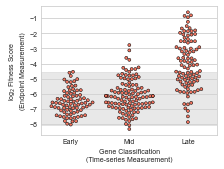

In [11]:
sns.set_style('whitegrid')
#fig = plt.figure(figsize = (58/25.4, 74.5/25.4))
fig = plt.figure(figsize = (80/25.4, 60/25.4))
ax = fig.add_subplot(1,1,1)
plt.rcParams["font.family"] = "Arial"


df_plot = df_df_KDcols_gpby_AvgLR_km3f_selcols.copy()

plt.tick_params('both', labelsize = 7)


ax = sns.swarmplot(x = 'Class', y = 'LB_ae_avgLR_nmed', data = df_plot,
           order = ['Early', 'Mid', 'Late'], palette = ['#F37560', '#F37560', '#F37560'], 
                   dodge=True, s = 3, edgecolor = 'black', linewidth = 0.5)

x = df_df_KDcols_gpby_AvgLR_km3f_selcols[df_df_KDcols_gpby_AvgLR_km3f_selcols['Class'] == 'Early']['LB_ae_avgLR_nmed'].dropna().values
y = df_df_KDcols_gpby_AvgLR_km3f_selcols[df_df_KDcols_gpby_AvgLR_km3f_selcols['Class'] == 'Mid']['LB_ae_avgLR_nmed'].dropna().values
z = df_df_KDcols_gpby_AvgLR_km3f_selcols[df_df_KDcols_gpby_AvgLR_km3f_selcols['Class'] == 'Late']['LB_ae_avgLR_nmed'].dropna().values


ax.axhspan(ymin = min(x), ymax = max(x),
           xmin = 0, xmax = 1, color = 'lightgray', alpha = 0.5)

plt.xlabel('Gene Classification\n(Time-series Measurement)', fontsize = 7)
plt.ylabel('log$_2$ Fitness Score\n(Endpoint Measurement)', fontsize = 7)
plt.tick_params('both', labelsize = 7, length = 0)

plt.savefig('Section 4v9/Fig_4e-EndptVSTimeSeries_shade.pdf')

### Data Export

In [22]:
df_Fig4e = df_df_KDcols_gpby_AvgLR_km3f_selcols[['gene_name_F2', 'Class','LB_ae_avgLR_nmed']].reset_index(drop=True)
df_Fig4e.to_excel('Section 4v9/Table_Fig-4e.xlsx')
df_Fig4e

,gene_name_F2,Class,LB_ae_avgLR_nmed
0,accA,Mid,-6.603346
1,accB,Mid,-7.705001
2,accC,Mid,-6.174842
3,accD,Early,-7.174079
4,acpP,Early,-6.813555
...,...,...,...
282,yejM,Mid,-5.952893
283,yidC,Early,-6.933622
284,yihA,Late,-4.923629
285,yrfF,Late,-4.107046
